In [ ]:
# univariate lstm example
# Ref : https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

import argparse
from copy import deepcopy # Add Deepcopy for args
import time

# Sequence generation, model definition, prediciton

In [ ]:
def experiment(data, args):
    # split a univariate sequence into samples
    def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
            # find the end of this pattern
            end_ix = i + n_steps
            # check if we are beyond the sequence
            if end_ix > len(sequence)-1:
                break
            # gather input and output parts of the pattern
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
            X.append(seq_x)
            y.append(seq_y)
        return array(X), array(y)

    # choose a number of time steps
    n_steps = args.n_steps
    # split into samples
    X, y = split_sequence(data, n_steps)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))


    # define model
    print("--Model training start--")
    model = Sequential()
    model.add(LSTM(args.hid_dim, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=args.epoch, verbose=0)


    # demonstrate prediction
    print("--Prediction start--")
    test_xaxis = np.arange(0, 10*np.pi, 0.1)
    def test_function(x):
        return np.cos(x)
    calc_y = test_function(test_xaxis)
    # start with initial n values, rest will be predicted
    test_y = calc_y[:n_steps]
    results = []
    for i in range(len(test_xaxis) - n_steps):
        net_input = test_y[i : i + n_steps]
        net_input = net_input.reshape((1, n_steps, n_features))
        y = model.predict(net_input, verbose=0)
        test_y = np.append(test_y, y)


    return test_xaxis, calc_y, test_y

# Experiment

In [ ]:
parser = argparse.ArgumentParser()
args = parser.parse_args("")

# n_steps, hid_dim, epoch
args.n_steps = 20
args.hid_dim = 30
args.epoch = 20

# define input sequence
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = np.sin(xaxis)

# x, true_y, pred_y = experiment(train_seq, args) # single exp


# Multi-variable test (saving results into dataframe for further visualization)
name_var1 = 'n_steps'
name_var2 = 'hid_dim'

list_var1 = [10, 13, 15]
list_var2 = [10, 13, 15]

df = pd.DataFrame(columns=['x', 'true_y', 'pred_y', name_var1, name_var2])
for var1 in list_var1:
    for var2 in list_var2:
        setattr(args, name_var1, var1)
        setattr(args, name_var2, var2)
        print(args)
        
        ts = time.time()
        x, true_y, pred_y = experiment(train_seq, deepcopy(args))
        te = time.time()
        print(f'Elapsed time : {te-ts}s\n')

        newDf = pd.DataFrame({"x":x, "true_y":true_y, "pred_y":pred_y, name_var1:[var1]*len(x), name_var2:[var2]*len(x)})
        df = pd.concat([df, newDf])
        

Namespace(epoch=20, hid_dim=10, n_steps=10)
--Model training start--
--Prediction start--
Elapsed time : 22.61646318435669s

Namespace(epoch=20, hid_dim=13, n_steps=10)
--Model training start--
--Prediction start--
Elapsed time : 23.11977767944336s

Namespace(epoch=20, hid_dim=15, n_steps=10)
--Model training start--
--Prediction start--
Elapsed time : 22.8378324508667s

Namespace(epoch=20, hid_dim=10, n_steps=13)
--Model training start--
--Prediction start--
Elapsed time : 23.166210412979126s

Namespace(epoch=20, hid_dim=13, n_steps=13)
--Model training start--
--Prediction start--
Elapsed time : 24.779931783676147s

Namespace(epoch=20, hid_dim=15, n_steps=13)
--Model training start--
--Prediction start--
Elapsed time : 24.056538343429565s

Namespace(epoch=20, hid_dim=10, n_steps=15)
--Model training start--
--Prediction start--
Elapsed time : 24.239386796951294s

Namespace(epoch=20, hid_dim=13, n_steps=15)
--Model training start--
--Prediction start--
Elapsed time : 25.22457695007324

# Visualization

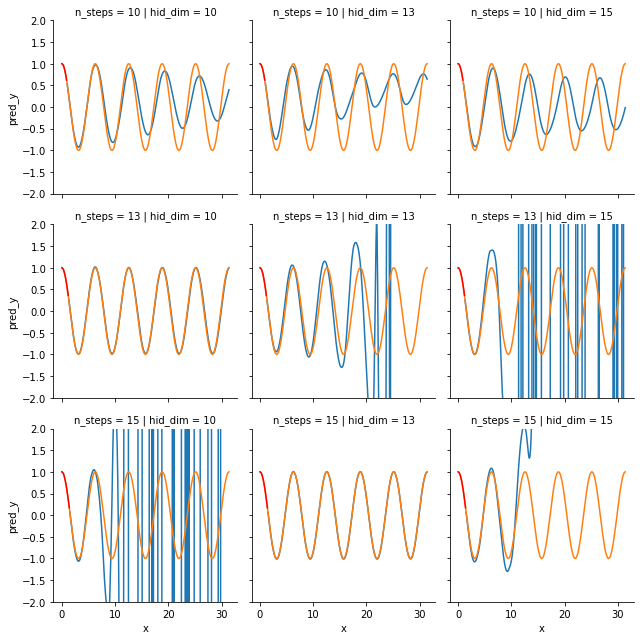

In [ ]:
g = sns.FacetGrid(df, row=name_var1, col=name_var2)
def dual_plot(x, pred_y, true_y, n_steps, **kwargs):
    n_steps = n_steps[0]

    plt.plot(x[n_steps:], pred_y[n_steps:], label="predicitons")
    plt.plot(x, true_y, label="ground truth")
    plt.plot(x[:n_steps], pred_y[:n_steps], label="initial sequence", color="red")
    plt.legend(loc='upper left')
    plt.ylim(-2, 2)

g.map(dual_plot, 'x', 'pred_y', 'true_y', 'n_steps')